In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score,confusion_matrix,roc_auc_score
from sklearn.utils import resample

### Data Loading

In [2]:

# Set random seed
np.random.seed(42)

# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Mnist_csv/mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Mnist_csv/mnist_test.csv')


In [3]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

### Data Exploration

In [4]:
# Combine train and test for initial exploration
df = pd.concat([train_df, test_df], axis=0)


print("Total samples:", len(df))
print("Number of features:", df.shape[1] - 1)  # minus the label column
print("Target classes:", sorted(df['label'].unique()))
print("\nClass distribution:")
print(df['label'].value_counts().sort_index())

Total samples: 70000
Number of features: 784
Target classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Class distribution:
label
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


### Data Visualization

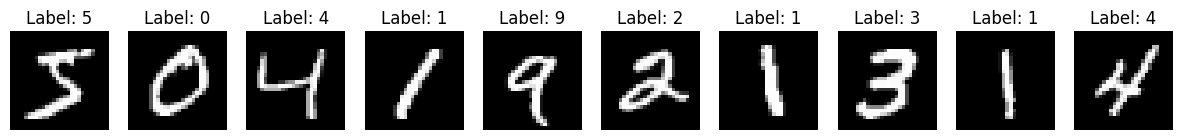

In [5]:
# Display sample images
def plot_digits(data, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in enumerate(axes):
        img = data.iloc[i, 1:].values.reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {data.iloc[i, 0]}")
        ax.axis('off')
    plt.show()

# Plot first 10 digits from training set
plot_digits(train_df)

### Data Preprocessing

In [6]:
# Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train.shape

(60000, 784)

### Model Training & Evluation

In [8]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVC": SVC()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_conf_matrix = confusion_matrix(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_conf_matrix = confusion_matrix(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Confusion Matrix:')
    print(model_train_conf_matrix)




    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Confusion Matrix:')
    print(model_test_conf_matrix)



    print('='*35)
    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.9351
- F1 score: 0.9350
- Precision: 0.9349
- Recall: 0.9351
- Confusion Matrix:
[[5768    1   13    8   13   40   33    8   35    4]
 [   1 6581   29   19    6   26    3   13   54   10]
 [  25   50 5444   91   62   24   59   57  122   24]
 [  17   24  118 5558    7  184   16   48  116   43]
 [  11   24   24    9 5506    7   49   19   34  159]
 [  48   19   38  146   45 4883   75   18  112   37]
 [  27   13   38    1   35   65 5710    5   21    3]
 [   8   20   62   23   41   10    4 5917   16  164]
 [  26   96   56  130   24  135   37   17 5275   55]
 [  21   26   14   67  130   33    3  149   45 5461]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9257
- F1 score: 0.9256
- Precision: 0.9256
- Recall: 0.9257
- Confusion Matrix:
[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4

### Hyperparameter Tuning With RandomizedSearchCV

In [12]:
logistic_params = {
        'C': [0.1, 1],
        'penalty': ['l2', 'none'],
        'solver': ['lbfgs'],
        'max_iter': [100, 200],
        'multi_class': ['auto']
}

svm_params = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'],
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

In [13]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("Logistic Regression", LogisticRegression(), logistic_params),
    ("SVM", SVC(), svm_params),
    ("Decision Tree", DecisionTreeClassifier(), dt_params)
]

In [14]:
# Dictionary to store best parameters
model_param = {}

for name, model, params in randomcv_models:
    print(f"\nStarting RandomizedSearchCV for {name}...")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

    print(f"\nBest parameters for {name}:")
    print(random.best_params_)

# Print all best parameters
print("\n================= Final Best Parameters =================")
for model_name in model_param:
    print(f"\n---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Starting RandomizedSearchCV for Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wr


Best parameters for Logistic Regression:
{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 200, 'C': 0.1}

Starting RandomizedSearchCV for SVM...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters for SVM:
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

Starting RandomizedSearchCV for Decision Tree...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters for Decision Tree:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}

================= Final Best Parameters =================

---------------- Best Params for Logistic Regression -------------------
{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 200, 'C': 0.1}

---------------- Best Params for SVM -------------------
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

---------------- Best Params for Decision Tree -------------------
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}


In [15]:
models={
    "Logisitic Regression":LogisticRegression(solver='lbfgs',
        penalty='l2',
        multi_class='auto',
        max_iter=200,
        C=0.1),
    "Decision Tree":DecisionTreeClassifier( min_samples_split=5,
        min_samples_leaf=1,
        max_features=None,
        max_depth=None,
        criterion='entropy'),
    "SVC": SVC(kernel='rbf',
        gamma='scale',
        C=1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_conf_matrix = confusion_matrix(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_conf_matrix = confusion_matrix(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Confusion Matrix:')
    print(model_train_conf_matrix)




    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Confusion Matrix:')
    print(model_test_conf_matrix)



    print('='*35)
    print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.9322
- F1 score: 0.9321
- Precision: 0.9320
- Recall: 0.9322
- Confusion Matrix:
[[5758    1   18   10   11   41   37    7   36    4]
 [   1 6578   33   16    6   27    3   11   56   11]
 [  27   56 5415   88   66   25   60   67  128   26]
 [  17   26  121 5543    5  188   19   52  109   51]
 [  13   26   27    8 5491    7   51   13   33  173]
 [  49   26   39  151   51 4858   80   18  103   46]
 [  29   14   35    1   35   68 5707    3   24    2]
 [  11   26   58   21   45   11    4 5906   16  167]
 [  30  110   59  134   23  135   38   16 5240   66]
 [  23   30   15   70  138   33    2  159   43 5436]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9258
- F1 score: 0.9256
- Precision: 0.9257
- Recall: 0.9258
- Confusion Matrix:
[[ 958    0    2    3    0    7    5    4    1    0]
 [   0 1113    2    2    0    1    4    2   11    0]
 [   6    8  927   15    8    3   13    8   37    7

### Testing Evaluation with Bootstrapping

In [20]:


def bootstrap_evaluation(model, X_test, y_test, n_iterations=100):
    """
    Perform bootstrap evaluation of a model and compute 95% confidence intervals
    """
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': []
    }

    has_proba = hasattr(model, "predict_proba")

    for _ in range(n_iterations):
        # Resample with replacement
        X_resampled, y_resampled = resample(X_test, y_test, replace=True)

        # Predictions
        y_pred = model.predict(X_resampled)

        # Metrics
        metrics['accuracy'].append(accuracy_score(y_resampled, y_pred))
        metrics['precision'].append(precision_score(y_resampled, y_pred, average='weighted'))
        metrics['recall'].append(recall_score(y_resampled, y_pred, average='weighted'))
        metrics['f1'].append(f1_score(y_resampled, y_pred, average='weighted'))

        # ROC AUC only if possible
        if has_proba:
            y_proba = model.predict_proba(X_resampled)
            metrics['roc_auc'].append(roc_auc_score(y_resampled, y_proba, multi_class='ovr'))

    # Remove ROC AUC if we couldn't compute it
    if not has_proba:
        metrics.pop('roc_auc')

    # Statistics
    results = {}
    for metric, values in metrics.items():
        mean_score = np.mean(values)
        std_dev = np.std(values)
        ci_lower = np.percentile(values, 2.5)
        ci_upper = np.percentile(values, 97.5)

        results[metric] = {
            'mean': mean_score,
            'std': std_dev,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper
        }

    return results


In [22]:
# Dictionary to store bootstrap results
bootstrap_results = {}

# Evaluate each model with bootstrapping
for name, model in models.items():  # using your tuned models dictionary
    print(f"\nRunning bootstrap evaluation for {name}...")
    bootstrap_results[name] = bootstrap_evaluation(model, X_test, y_test, n_iterations=100)

# Print results
print("\n================ Bootstrap Evaluation Results ================")
for model_name, metrics in bootstrap_results.items():
    print(f"\n----- {model_name} -----")
    for metric, stats in metrics.items():
        print(f"{metric.upper():<10}: {stats['mean']:.4f} ± {stats['std']:.4f}")
        print(f"          95% CI: [{stats['ci_lower']:.4f}, {stats['ci_upper']:.4f}]")



Running bootstrap evaluation for Logisitic Regression...

Running bootstrap evaluation for Decision Tree...

Running bootstrap evaluation for SVC...

================ Bootstrap Evaluation Results ================

----- Logisitic Regression -----
ACCURACY  : 0.9256 ± 0.0025
          95% CI: [0.9207, 0.9300]
PRECISION : 0.9256 ± 0.0025
          95% CI: [0.9207, 0.9302]
RECALL    : 0.9256 ± 0.0025
          95% CI: [0.9207, 0.9300]
F1        : 0.9254 ± 0.0025
          95% CI: [0.9206, 0.9299]
ROC_AUC   : 0.9941 ± 0.0004
          95% CI: [0.9932, 0.9948]

----- Decision Tree -----
ACCURACY  : 0.8858 ± 0.0034
          95% CI: [0.8796, 0.8925]
PRECISION : 0.8859 ± 0.0034
          95% CI: [0.8798, 0.8926]
RECALL    : 0.8858 ± 0.0034
          95% CI: [0.8796, 0.8925]
F1        : 0.8857 ± 0.0034
          95% CI: [0.8796, 0.8923]
ROC_AUC   : 0.9404 ± 0.0018
          95% CI: [0.9369, 0.9436]

----- SVC -----
ACCURACY  : 0.9791 ± 0.0014
          95% CI: [0.9764, 0.9818]
PRECISION : 0.9